In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

import json
import datadict
import functions
import devices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = datadict.DataFile("data_new_PV.json")

# print default impact value (climate change for the cell of monocrystalline)
data.impact_value()

236.53465

In [5]:
data.get_layers()
data.layer_selected = "Cell"

data.get_layer_options()
data.layer_options
data.layer_option_selected = 'cell'


data.get_locations()
data.locations
data.location_selected = 'RER'


In [277]:
all_layers = []

for module in data.module_types:
    # print(module)
    data.module_type_selected = module
    data.get_layers()

    for l in data.layers:
        all_layers.append(l)
        


In [278]:
base_dict = {}

for module in data.module_types:
    data.module_type_selected = module
    data.get_layers()
    base_dict[module] = {}
    
    for l in data.layers:
    
        data.layer_selected = l 
        data.get_layer_options()
        base_dict[module][l] = data.layer_options
        
base_dict

{'Organic PV': {'Back electrode': ['Aluminum production'],
  'Electron transport layer': ['Lithium fluoride'],
  'Substrate': ['PET'],
  'Encapsulant': ['PET'],
  'FTO': ['Indium tin oxide', 'Tin dioxide', 'Fluorine production'],
  'Hole transport layer': ['Polystyrene',
   'Polyvinylfluoride production',
   'Molybdenum trioxide production'],
  'P3HT': ['Bromine',
   'Electricity medium voltage',
   'Hexane production',
   'Thiophene - Butanes production',
   'Thiophene - Sulphur',
   'Heat, heavy fuel oil'],
  'PCBM': ['Methanol',
   'Solvent organic',
   'Electricity medium voltage',
   'Monochlorobenzene',
   'Nitrogen',
   'o-Dichlorobenzene',
   'Pyridine-compounds',
   'Toluene',
   'Xylene'],
  'Front cover': ['Glass', 'Tempering', 'Polycarbonate'],
  'Rear cover': ['Polyvinylfluoride film',
   'Polyethylene terephthalate',
   'Flat glass, uncoated'],
  'Junction box': ['Glass fibre reinforced plastic'],
  'Wires': ['Copper'],
  'Electricity for assembly': ['Electricity medium v

In [279]:
data.data_dict['Inverter'].keys()

dict_keys(['Additional data', '0.5 kW', '2.5 kW', '500 kW'])

In [280]:
data.module_types

['Organic PV',
 'Silicon tandem',
 'Monocrystalline',
 'Polycrystalline',
 'CdTe',
 'CIGS']

In [281]:
data.cell_type_selected = 'CIGS'

In [282]:
data.get_layers()
data.layers

['Frame',
 'Front cover',
 'TCO',
 'Encapsulant',
 'Cell',
 'Rear cover',
 'Junction box',
 'Wires',
 'Electricity for assembly']

In [283]:
data.layer_selected = 'Cell'

In [284]:
data.get_layer_options(data.cell_type_selected, data.layer_selected)
data.layer_options


TypeError: DataFile.get_layer_options() takes 1 positional argument but 3 were given

In [292]:
data.layer_option_selected = 'cell'

In [ ]:
data.location_selected = 'RoW'

In [ ]:
for impact_category in data.impact_categories:
    data.impact_category_selected = impact_category
    print(impact_category, data.impact_value()
          )

climate change 212.48394
fossil 2659.46642
agricultural land occupation 11.55653
ozone depletion 2e-05
terrestrial acidification 0.81391
photochemical oxidant formation 0.77945
metal depletion 11.72803
water depletion 7.06593
freshwater ecotoxicity 7.10556
urban land occupation 1.19636
particulate matter formation 0.50605
freshwater eutrophication 0.10367
natural land transformation -0.01591
marine eutrophication 0.08936
ionising radiation 23.47258


# What are all of the location options?


In [ ]:
data.module_types

['Organic PV',
 'Silicon tandem',
 'Monocrystalline',
 'Polycrystalline',
 'CdTe',
 'CIGS']

In [ ]:
locations = []

for module_type in data.module_types:
    data.module_type_selected = module_type
    data.get_layers()
    for layer in data.layers:
        data.layer_selected = layer
        data.get_layer_options()
        for layer_option in data.layer_options:
            data.layer_option_selected = layer_option
            data.get_locations()
            for location in data.locations:
                locations.append(location)
                
list(set(locations))

['WECC-US',
 'ZA',
 'PE',
 'RAS',
 'Asia without China and GCC',
 'CN',
 'RoW',
 'CO',
 'ROW',
 'CA-QC',
 'GLO',
 'Asia without China',
 'IN',
 'BR',
 'US-WECC',
 'RER',
 'US',
 'CH',
 'Europe without Switzerland']

In [ ]:
['RER',
 'WECC-US',
 'CA-QC',
 'US',
 'ROW',
 'CN',
 'GLO',
 'RoW',
 'Asia without China']

# Test System

In [17]:
my_sys = devices.System("cdte")
my_sys.system_loss_factor = 0
print(my_sys.n_devices)
print(my_sys.system_output(800,20), "kWh")
print(my_sys.n_devices * my_sys.device.P_ref)

5
1584.2937200000001 kWh
2150


In [236]:



t_amb = 25

all_data = {}

self_cons_iterate = np.arange(0.05,1.01+0.01,0.05).round(2)


for device_name in ["monocrystalline", "polycrystalline", "cdte", "cigs", "organic", "perovskite"]:
    print(device_name)
    all_data[device_name] = {}
    for loss_factor in np.arange(0.0,1,0.05).round(2):
        loss_factor_str = f'{loss_factor:.2f}'
        
        all_data[device_name][loss_factor_str] = {}
        my_sys = devices.System(device_name, loss_factor=loss_factor)
        impact_value = my_sys.device.default_impact * my_sys.device.module_area

        my_data = {}
        # [0.01] + list(np.arange(0.05,1.01,0.05).round(2))
        for self_cons_factor in self_cons_iterate:
            self_cons_factor_str = f'{self_cons_factor:.2f}'
            all_data[device_name][loss_factor_str][self_cons_factor_str] = {}
            sys_impact = []
            g_eff_range = np.linspace(0,2000,500)#np.arange(1,1000,2)
            for g_eff in g_eff_range:
                # if g_eff==0.:
                    
                my_sys.system_output(g_eff,t_amb)
                cumulative_impact = my_sys.system_cumulative_impact(impact_value, self_cons_factor)
                sys_impact.append(cumulative_impact)
            sys_impact[0] = sys_impact[1]
            g_eff_range[0] = g_eff_range[1]
            df = pd.DataFrame({"Impact":sys_impact,
                    "Irradiance":g_eff_range})
            # df = df[df['Impact']<=2]
            # df = df[df['Irradiance']<=1000]#.to_csv(f"/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/sample_curve_{self_sufficiency_factor}.csv",index=None)
            df = df.round(3)
            all_data[device_name][loss_factor_str][self_cons_factor_str]['Impact'] = df['Impact'].tolist()
            all_data[device_name][loss_factor_str][self_cons_factor_str]['Irradiance'] = df['Irradiance'].tolist()
with open("/Users/jmccarty/GitHub/parametric-bipv-app/static/data/sample_curves_all.json","w") as fp:
    json.dump(all_data, fp)

monocrystalline
polycrystalline
cdte
cigs
organic
perovskite


In [238]:
all_data['monocrystalline']['0.95']["0.50"]

{'Impact': [42076.776,
  42076.776,
  10524.249,
  4679.675,
  2633.583,
  1686.304,
  1171.608,
  861.185,
  659.662,
  521.466,
  422.591,
  349.416,
  293.748,
  250.415,
  216.024,
  188.271,
  165.553,
  146.72,
  130.934,
  117.57,
  106.159,
  96.336,
  87.82,
  80.388,
  73.864,
  68.106,
  62.999,
  58.447,
  54.373,
  50.712,
  47.411,
  44.423,
  41.71,
  39.24,
  36.984,
  34.917,
  33.021,
  31.275,
  29.665,
  28.177,
  26.799,
  25.52,
  24.331,
  23.224,
  22.191,
  21.226,
  20.323,
  19.477,
  18.683,
  17.937,
  17.236,
  16.574,
  15.951,
  15.362,
  14.806,
  14.279,
  13.781,
  13.308,
  12.859,
  12.433,
  12.028,
  11.643,
  11.276,
  10.926,
  10.593,
  10.274,
  9.97,
  9.68,
  9.402,
  9.136,
  8.881,
  8.637,
  8.403,
  8.178,
  7.962,
  7.755,
  7.556,
  7.365,
  7.181,
  7.004,
  6.833,
  6.669,
  6.51,
  6.358,
  6.21,
  6.068,
  5.931,
  5.798,
  5.67,
  5.546,
  5.426,
  5.31,
  5.198,
  5.089,
  4.984,
  4.882,
  4.783,
  4.688,
  4.595,
  4.505,
  4.4

In [60]:
import proplot as pplt
from scipy.optimize import curve_fit
from sklearn import metrics

def decay_func(t,N,l,a):
        return N * np.exp(-l * t) + a

In [191]:
annual_output = ((0.008 * Geff**2) / Gstc) * (1 + gamma * (Tamb + ((Tnoc - 20) / 80) * (Geff * 0.1)) * Ndev)
# lifetime_output = 

20     7.021662
21     5.859123
22     5.007817
23     4.366667
24     3.872886
         ...   
245    1.014098
246    1.013085
247    1.013085
248    1.013085
249    1.013085
Name: Impact, Length: 230, dtype: float64

[6.34695758 0.01624628 0.04224156]
0.83


/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/s

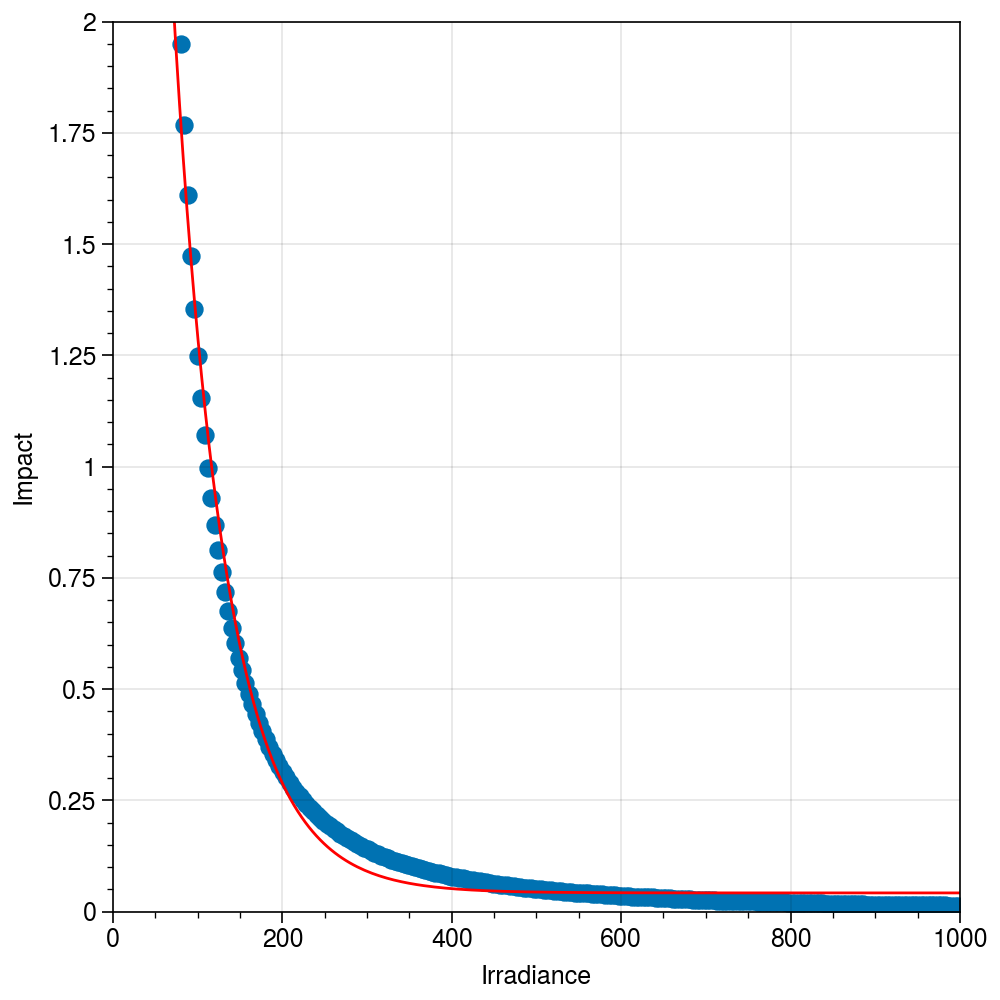

In [193]:
x = df['Irradiance']
y = df['Impact']
x_new = x[x<=1000]
y_new = y[x<=1000]
x_true = x_new[y_new<=2]
y_true = y_new[y_new<=2]
y_norm = (y_true - np.min(y_true)) / (np.max(y_true) - np.min(y_true))
p0 = (0.1,1e-10,0.01)
popt, pcov = curve_fit(decay_func, x_true, y_true, p0, maxfev=1000)
N, l, a = popt
print(popt)
x_lin = np.linspace(0,1000,len(x_true))
y_pred = decay_func(x_lin, N, l, a)
rmse = round(np.sqrt(metrics.mean_squared_error(y_true,y_pred)),2)
print(rmse)
fig, axe = pplt.subplots(figsize=(5,5), facecolor='white')
ax = axe[0]
reg_plot = ax.plot(x_lin,
                        y_pred, 
                        lw=1,
                        ls='solid',
                        color='red',)

ax.scatter(x_true, y_true)

ax.format(xlim=(0,1000),
          ylim=(0,2))

/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:862: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor rel

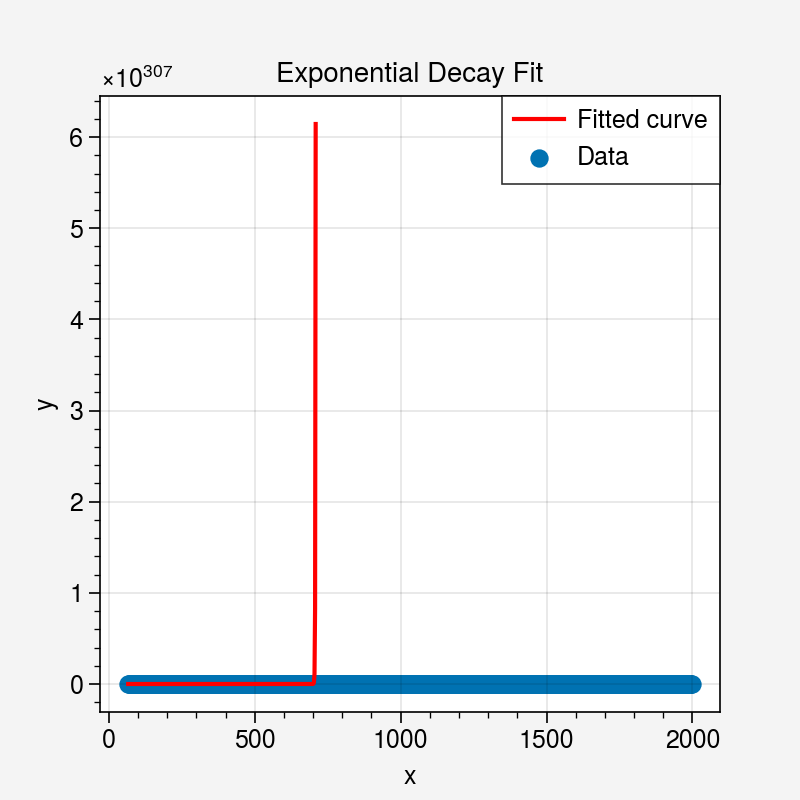

Fitted parameters: a = 1.0, b = 1.0, c = 1.0


In [123]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
x_data = x_true
y_data = y_true

# Define the form of the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the exponential decay function to the data
popt, pcov = curve_fit(exp_decay, x_data, y_data, maxfev = 1000)

# Extract the fitted parameters
a_fitted, b_fitted, c_fitted = popt

# Generate y-values from the fitted function
y_fitted = exp_decay(x_data, *popt)

# Plotting
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data.values, y_fitted.values, label='Fitted curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Decay Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Fitted parameters: a = {a_fitted}, b = {b_fitted}, c = {c_fitted}")


In [4]:
functions.pv_watts_method(1000, 25, my_sys.device.P_ref, my_sys.device.gamma)

325.0

In [7]:
data = datadict.DataFile("data_new_PV.json")


# my_sys.system_cumulative_impact(data.impact_value())

In [86]:
[0.01] + list(np.arange(0.05,1.01,0.05).round(2))

np.arange(0.05,0.96,0.05).round(2)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

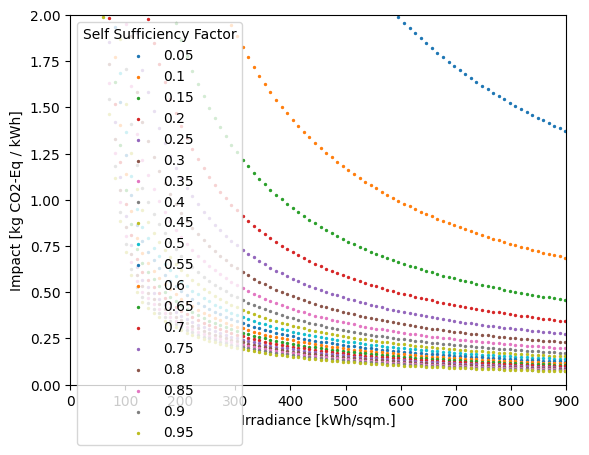

In [92]:

g_eff_range = np.linspace(0,1000,100)#np.arange(1,1000,2)
t_amb = 25

sys_impact_a = []
self_sufficiency_factor = 0.9
for g_eff in g_eff_range:
    my_sys.system_output(g_eff,t_amb)
    sys_impact_a.append(my_sys.system_cumulative_impact(data.impact_value(), self_sufficiency_factor))

sys_impact_b = []
self_sufficiency_factor = 0.5
for g_eff in g_eff_range:
    my_sys.system_output(g_eff,t_amb)
    sys_impact_b.append(my_sys.system_cumulative_impact(data.impact_value(), self_sufficiency_factor))

fig, axe = plt.subplots()

my_data = {}

self_suff_iterate = np.arange(0.05,0.95+0.01,0.05).round(2)
# [0.01] + list(np.arange(0.05,1.01,0.05).round(2))
for self_sufficiency_factor in self_suff_iterate:
    sys_impact = []
    for g_eff in g_eff_range:
        my_sys.system_output(g_eff,t_amb)
        sys_impact.append(my_sys.system_cumulative_impact(data.impact_value(), self_sufficiency_factor))
    axe.scatter(x = g_eff_range,
            y = sys_impact,
            s = 2,
            label=self_sufficiency_factor)
    # if self_sufficiency_factor in [0.01, 0.50, 1.00]:
    my_data[self_sufficiency_factor] = {}
    df = pd.DataFrame({"Impact":sys_impact,
            "Irradiance":g_eff_range})
    df = df[df['Impact']<=2]
    df = df[df['Irradiance']<=1200]#.to_csv(f"/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/sample_curve_{self_sufficiency_factor}.csv",index=None)
    df = df.round(3)
    my_data[self_sufficiency_factor]['Impact'] = df['Impact'].tolist()
    my_data[self_sufficiency_factor]['Irradiance'] = df['Irradiance'].tolist()
        
plt.ylim(0,2)
plt.xlim(0,900)

plt.ylabel("Impact [kg CO2-Eq / kWh]")
plt.xlabel("Irradiance [kWh/sqm.]")
# plt.title(self_sufficiency_factor)
plt.legend(title="Self Sufficiency Factor")

with open("/Users/jmccarty/GitHub/parametric-bipv-app/sample_figure/sample_curves.json","w") as fp:
    json.dump(my_data, fp)

In [96]:
len(my_data[.95]['Irradiance'])

94

In [78]:
import json


# Build Website Features

In [20]:
base_dict = {}

for module in data.module_types:
    data.module_type_selected = module
    data.get_layers()
    base_dict[module] = {}
    
    for l in data.layers:
    
        data.layer_selected = l 
        data.get_layer_options()
        # if len(data.layer_options)<2:
        #     pass
        # else:
        base_dict[module][l] = {}
        base_dict[module][l]['Options'] = data.layer_options
        
        layer_option_locations = {}
        for option in data.layer_options:
            data.layer_option_selected = option
            data.get_locations()
            layer_option_locations[option] = data.locations
            
        base_dict[module][l]['Locations Per Option'] = layer_option_locations

# technology = "Monocrystalline"
technology_data = base_dict["Monocrystalline"]
technology_data

{'Frame': {'Options': ['Aluminium profile'],
  'Locations Per Option': {'Aluminium profile': ['RER', 'RoW', 'GLO']}},
 'Electricity for assembly': {'Options': ['Electricity medium voltage'],
  'Locations Per Option': {'Electricity medium voltage': ['CN',
    'RER',
    'US-WECC',
    'RAS',
    'Asia without China and GCC']}},
 'Front cover': {'Options': ['Glass', 'Tempering', 'Polycarbonate'],
  'Locations Per Option': {'Glass': ['RER', 'RoW'],
   'Tempering': ['RoW', 'RER'],
   'Polycarbonate': ['RoW', 'RER']}},
 'Encapsulant': {'Options': ['EVA', 'Epoxy resin', 'Polyurethane'],
  'Locations Per Option': {'EVA': ['GLO', 'RER', 'RoW'],
   'Epoxy resin': ['RER', 'RoW'],
   'Polyurethane': ['GLO']}},
 'Rear cover': {'Options': ['Polyvinylfluoride film',
   'Polyethylene terephthalate'],
  'Locations Per Option': {'Polyvinylfluoride film': ['RoW', 'US'],
   'Polyethylene terephthalate': ['RER', 'RoW', 'CA-QC']}},
 'Cell': {'Options': ['cell'],
  'Locations Per Option': {'cell': ['RER', '